#  Identify Spam Using Supervised Machine Learning
Author: Jintong Yu

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from statistics import mean
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

## 1. Import the spam dataset and print the first 6 rows

In [ ]:
df = pd.read_csv('/content/spam_dataset.csv')
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
df.columns

Index(['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_report:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_email:',
       'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:',
       'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:',
       'word_freq_415:', 'word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       '

## 2. Read through the documentation and select 3 variables that seem to be important predictors of spam, why?

In [ ]:
# select spam emails
spam = df.loc[df['spam'] == 1]
spam.describe()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
count,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,...,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.0
mean,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415,1.0
std,0.310645,0.348919,0.480725,2.219087,0.707195,0.321927,0.572110,0.544864,0.354804,0.631384,...,0.091621,0.282141,0.047449,0.744183,0.360479,0.611941,49.846186,299.284969,825.081179,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.094000,0.000000,0.000000,2.324000,15.000000,93.000000,1.0
50%,0.000000,0.000000,0.300000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.331000,0.080000,0.000000,3.621000,38.000000,194.000000,1.0
75%,0.170000,0.210000,0.640000,0.000000,0.780000,0.240000,0.340000,0.190000,0.190000,0.510000,...,0.000000,0.144000,0.000000,0.645000,0.211000,0.018000,5.708000,84.000000,530.000000,1.0
max,4.540000,4.760000,3.700000,42.810000,7.690000,2.540000,7.270000,11.110000,3.330000,7.550000,...,1.117000,9.752000,1.171000,7.843000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.0


In [ ]:
# find the top 10 attributes with the highest mean values
# exclude length attributes with column index as 54, 55, 56
spam_mean_df = pd.DataFrame(spam.iloc[:,0:54].mean().tolist())
spam_mean_df = spam_mean_df.rename(columns={0: 'Mean'})
spam_mean_df.sort_values(by='Mean', ascending=False).head(10)

,Mean
18,2.264539
20,1.380370
11,0.549972
15,0.518362
4,0.513955
51,0.513713
2,0.403795
9,0.350507
17,0.319228
16,0.287507


In [ ]:
mean_df = pd.DataFrame(df.iloc[:,0:54].mean().tolist())
mean_df = mean_df.rename(columns={0: 'Mean'})
mean_df.sort_values(by='Mean', ascending=False).head(10)

,Mean
18,1.662100
20,0.809761
26,0.767305
24,0.549504
11,0.541702
4,0.312223
44,0.301224
2,0.280656
51,0.269071
25,0.265384


In [ ]:
index = [18, 20, 15]
spam.columns[index]

Index(['word_freq_you:', 'word_freq_your:', 'word_freq_free:'], dtype='object')

**Conclusion**  
Because of their higher mean values, "word_freq_you:", "word_freq_your:", and "word_freq_free:" could be important predictors of spam emails.    
  
To make mean values comparable, I exclude 3 attributes related to length. By ranking frequencies mean values for the spam-email-only dataset, we notice that attributes with index 18, 20, and 11 have the higher frequencies mean values. Attributes 18 and 20 are chosen because they have a higher frequency mean values in spam-email-only dataset, meaning that spam emails might contain more "you" and "your" words compared to non-spam emails. However, since attributes 11 is also one of the attributes in the overall dataset that have higher mean values of frequency and the mean value is similar to that of spam-email-only dataset, I exclude this attribute and choose the attribute 15, which ranks 4th of the frequency mean values in the spam-email-only dataset.

## 3. Visualize the univariate distribution of each of the 3 explanatory variables

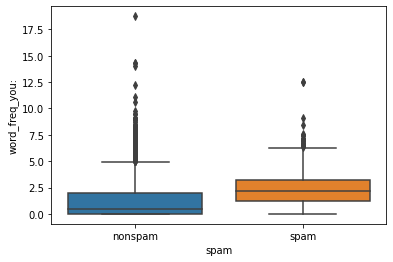

In [ ]:
# "word_freq_you:"
ax = sns.boxplot(data=df, x='spam', y='word_freq_you:')
ax.set_xticklabels(['nonspam', 'spam'])
plt.show()

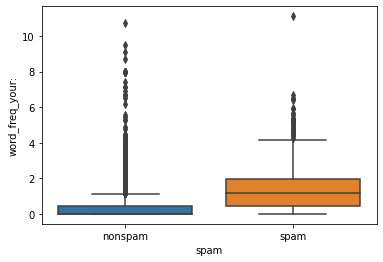

In [ ]:
# "word_freq_your:"
ax = sns.boxplot(data=df, x='spam', y='word_freq_your:')
ax.set_xticklabels(['nonspam', 'spam'])
plt.show()

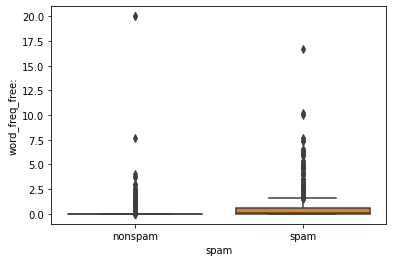

In [ ]:
# "word_freq_free:"
ax = sns.boxplot(data=df, x='spam', y='word_freq_free:')
ax.set_xticklabels(['nonspam', 'spam'])
plt.show()

## 4. Name supervised learning models that we have learned that can be used to predict dependent variables like "spam"

* K Nearest Neighbors
* Logistic Regression (w/ or w/o penalty)
* Decision Trees Classification
* Decision Trees Classification with Bagging
* Random Forest Classification
* Gradient Boosting Classification
* Support Vector Machines

## 5. Describe the importance of training and test data. Why do we separate data into these subsets?

Since the goal of machine learning is to make accurate prediction for unseen data, train/test split helps to test the performance of machine learning models by separating training set that is used to fit the model and test set that is used to represent unseen data and test performance. Without train/test split, machine learning models that use all samples as training data might become overfitting, in other words, they fit so well on the samples but have weaker prediction or generalization on unseen data. Essentially, dataset should be large enough to implement train/test split.  

## 6. What is k-fold cross-validation and what do we use it for?

K-fold cross-validation is a resampling method that is used to measure performance of a machine learning model on a limited dataset.  

K refers to the number of groups that a given training dataset will be split into. Each group will be considered as test set once and used as training set for (k-1) times. The k evaluation scores will be summarized to produce one evaluation score for the model.  

The evaluation method is used for estimating the performance of a machine learning model on predicting unseen data. The method provides a more accurate or less biased measurement for a model compared to the simple train/test split since every sample will be used for both learning and testing, therefore, the model fitting result will not depend on a particular choice of training set.

## 7. K-fold CV vs. Stratified K-fold CV

While k-fold cross-validation just divide the training set into k folds/groups, stratified k-fold cross validation ensures that each fold has the same proportion of observations with a given label. Stratified k-fold cross-validation can be used for classification problem of imbalance class distribution.

## 8. Build the first model:  
* Train/test split
* Build a model with 3 variables
* Describe parameters
* Evaluate the model using:
  * Test data
  * k-fold cross-validation

In [ ]:
# KNN
subset1 = df.iloc[:, [15, 18, 20, 57]]
subset1.head()

,word_freq_free:,word_freq_you:,word_freq_your:,spam
0,0.32,1.93,0.96,1
1,0.14,3.47,1.59,1
2,0.06,1.36,0.51,1
3,0.31,3.18,0.31,1
4,0.31,3.18,0.31,1


In [ ]:
# define X and y
y = subset1['spam']
X = subset1.loc[:, subset1.columns != 'spam']
display(X.head())
print(y[0:5])

,word_freq_free:,word_freq_you:,word_freq_your:
0,0.32,1.93,0.96
1,0.14,3.47,1.59
2,0.06,1.36,0.51
3,0.31,3.18,0.31
4,0.31,3.18,0.31


0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


In [ ]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

# standardize the dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# instantiate k-fold CV
kfold = KFold(n_splits=5)

# set parameters for grid search CV
param_grid = {'n_neighbors': np.arange(1,23,2)}

# instantiate grid search
grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=kfold)

# fit model
grid.fit(X_train_scaled, y_train)

# print scores and the best parameter
print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

The best mean cross-validation score: 0.8061
The best parameter: {'n_neighbors': 15}
The test score: 0.8071


**Conclusion**  
The best parameter using grid search cross-validation is 15. Since the KNN classification model require a majority vote, grid search of k is based on odd numbers. Moreover, k=15 falls in the middle of the grid rather than edges, therefore, 15 should be the optimum.

## 9. Build the second model  
Did the test score better than the previous model?

In [ ]:
# logistic regression w/o penalty (no scaling, no parameter)
# instantiate the model
logreg = LogisticRegression(penalty='none').fit(X_train, y_train)

# print scores
print("The best mean cross-validation score: {:.4f}".format(mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))
print("The test score: {:.4f}".format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: F

The best mean cross-validation score: 0.7646
The test score: 0.7619


In [ ]:
# logistic regression with l2 penalty
# set parameters for grid search CV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# instantiate grid search
grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid = param_grid, cv=kfold)

# fit model
grid.fit(X_train, y_train)

# print scores and the best parameter
print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score: 0.7649
The best parameter: {'C': 1}
The test score: 0.7619


In [ ]:
# logistic regression with l1 penalty
# set parameters for grid search CV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# instantiate grid search
grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid = param_grid, cv=kfold)

# fit model
grid.fit(X_train, y_train)

# print scores and the best parameter
print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score: 0.7646
The best parameter: {'C': 1}
The test score: 0.7637


**Conclusion**  
The best parameter using grid search cross-validation is C=1. C=1 falls in the middle of the grid rather than edges, therefore, C=1 should be the optimum.  

No matter whether the logistic regression model has a penalty parameter or not, the test score is not as good as the KNN model.

## 10. Build the third model  
Did the test score better than the previous models?

In [ ]:
# decision trees classification
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 15, 20, 50, 100]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid = param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score: 0.8035
The best parameter: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
The test score: 0.7889


**Conclusion**  
The best parameters for the decision trees classification model are criterion = 'gini', max_depth = 4, and min_samples_leaf = 10. While the first 2 parameters fall in the values within the grid, I have tries several values in the range(5, 20) and the grid search finally select 10 as the optimum.  

The test score is higher than that of logistic regression models but lower than that of KNN classification model. 

## 11. Build the fourth model  
Evaluate prediction error, did the model predict better than previous ones?

In [ ]:
# random forests classification
param_grid = {'n_estimators': [25, 30, 35, 40],
              'max_depth': [3, 4, 5],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

grid = GridSearchCV(RandomForestClassifier(random_state=2), param_grid = param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score: 0.8113
The best parameter: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6, 'n_estimators': 35}
The test score: 0.7889


**Conclusion**  
The best parameters for the random forests classification model are criterion = 'gini', max_depth = 4, min_samples_leaf = 6, and n_estimator = 35. Since all the selected parameters fall in the middle of the grid, they are optimum compared to other values in the grid.

By measuring cross-validation score, the SVM Classification model has the best results, but its test score is not as good as the KNN classification model. Based on the cross-validation results, **the best model is the SVM classification model**.

## 12. Rerun the best model with 3 more variables  
Did the test score result improve?

In [ ]:
subset2 = df.iloc[:, [2, 4, 15, 18, 20, 51, 57]]
subset2.head()

y = subset2['spam']
X = subset2.loc[:, subset2.columns != 'spam']
display(X.head())
print(y[0:5])

,word_freq_all:,word_freq_our:,word_freq_free:,word_freq_you:,word_freq_your:,char_freq_!:
0,0.64,0.32,0.32,1.93,0.96,0.778
1,0.50,0.14,0.14,3.47,1.59,0.372
2,0.71,1.23,0.06,1.36,0.51,0.276
3,0.00,0.63,0.31,3.18,0.31,0.137
4,0.00,0.63,0.31,3.18,0.31,0.135


0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=3)

# standardize the dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# random forests classification (the best model so far)
param_grid = {'n_estimators': [40, 45, 50, 55],
              'max_depth': [8, 9, 10, 11, 12],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3]}

grid = GridSearchCV(RandomForestClassifier(random_state=2), param_grid = param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score: 0.8739
The best parameter: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 45}
The test score: 0.8758


**Conclusion**  
The test score of the new model with 6 variables is higher than those of previous models with 3 variables.

## 13. Rerun all the other models with 6 variables and choose the best model

In [ ]:
# KNN
param_grid = {'n_neighbors': np.arange(1,23,2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=kfold)

grid.fit(X_train_scaled, y_train)

print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

The best mean cross-validation score: 0.8472
The best parameter: {'n_neighbors': 7}
The test score: 0.8349


In [ ]:
# Logistic Regression 1
# simple logistic regression
logreg = LogisticRegression(penalty='none').fit(X_train, y_train)

print("The best mean cross-validation score: {:.4f}".format(mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))
print("The test score: {:.4f}".format(logreg.score(X_test, y_test)))

The best mean cross-validation score: 0.8110
The test score: 0.8123


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1173: F

In [ ]:
# Logistic Regression 2
# l2 penalty
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid = param_grid, cv=kfold)

grid.fit(X_train, y_train)

print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score: 0.8119
The best parameter: {'C': 0.1}
The test score: 0.8115


In [ ]:
# Logistic Regression 3
# l1 penalty
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid = param_grid, cv=kfold)

grid.fit(X_train, y_train)

print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score: 0.8110
The best parameter: {'C': 1}
The test score: 0.8115


In [ ]:
# decision trees classification
param_grid = {'max_depth': [4, 5, 6, 7],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3, 4, 5, 10]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=4), param_grid = param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("The best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("The best parameter: {}".format(grid.best_params_))
print("The test score: {:.4f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score: 0.8557
The best parameter: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}
The test score: 0.8462


**Conclusion**  
According to the cross-validation scores of these models, the random forests classification model with the highest cross-validation score is the best and final model.

## 14. Speculate about a variable outside the the model that can increase the model's predictive power

In [ ]:
spam.columns[9]

'word_freq_mail:'

**Reasoning**  
Apart from the selected 6 variables, according to the rank output about mean frequency values in question 2, the following variable that distinguishes the spam email from non-spam email is attribute 9; in other words, spam emails might include the word "mail" more compared to nonspam emails.